Load the Data

In [137]:
import pandas as pd
df = pd.read_csv("N:/Interships/Future Intern ML/Datasets/Spotify dataset.csv")

In [139]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [141]:
# show first few rows
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


Clean the Data

In [159]:
#our dataset contains irrelevant columns and catogical data(non-numerical features)
df=df.drop(columns=['name','album','artist','id','release_date'],errors='ignore')
from sklearn.preprocessing import LabelEncoder
print(df['mood'].unique())
label=LabelEncoder()
df['mood']=label.fit_transform(df['mood'])


['Happy' 'Sad' 'Energetic' 'Calm']


Mood Distribution Visualization

C:\Users\mani2\AppData\Local\Temp\ipykernel_20504\895386826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'mood', order = df['mood'].value_counts().index, palette = 'viridis')


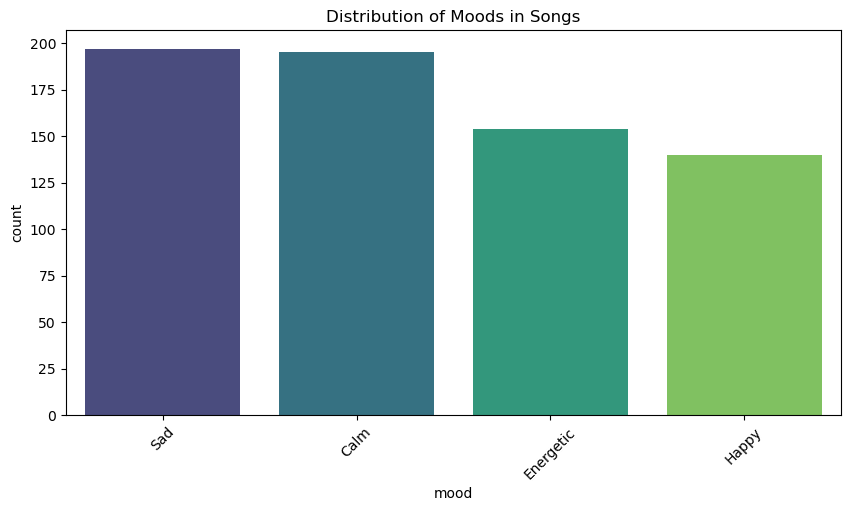

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'mood', order = df['mood'].value_counts().index, palette = 'viridis')
plt.xticks(rotation = 45)
plt.title("Distribution of Moods in Songs")
plt.show()

Separete dataset into features and labels

In [162]:
df.info()
x,y=df.iloc[:,0:-1],df.iloc[:,-1]
print(x,y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        686 non-null    int64  
 1   length            686 non-null    int64  
 2   danceability      686 non-null    float64
 3   acousticness      686 non-null    float64
 4   energy            686 non-null    float64
 5   instrumentalness  686 non-null    float64
 6   liveness          686 non-null    float64
 7   valence           686 non-null    float64
 8   loudness          686 non-null    float64
 9   speechiness       686 non-null    float64
 10  tempo             686 non-null    float64
 11  key               686 non-null    int64  
 12  time_signature    686 non-null    int64  
 13  mood              686 non-null    int32  
 14  mood_encoded      686 non-null    int32  
dtypes: float64(9), int32(2), int64(4)
memory usage: 75.2 KB
     popularity  length  danceabili

Encode Mood Labels

In [149]:
from sklearn.preprocessing import LabelEncoder

# initialize label encoder
le = LabelEncoder()

# encode the mood column
df['mood_encoded'] = le.fit_transform(df['mood'])

# mapping of moods to numbers
mood_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mood Encoding:", mood_mapping)

# update target variable
y = df['mood_encoded']

Mood Encoding: {'Calm': 0, 'Energetic': 1, 'Happy': 2, 'Sad': 3}


Split Data into Training & Testing Sets

In [164]:

from sklearn.model_selection import train_test_split
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=42)

Train a Machine Learning Model

In [166]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=20)
model.fit(a,c)
print(model.score(b,d))

1.0


In [170]:
# evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
y_pre=model.predict(b)
cm=confusion_matrix(d,y_pre)
pre=precision_score(d,y_pre,average="weighted")
re=recall_score(d,y_pre,average="weighted")
print("confusion matrix",cm)
print("precision",pre)
print("recall",re)

confusion matrix [[41  0  0  0]
 [ 0 32  0  0]
 [ 0  0 25  0]
 [ 0  0  0 40]]
precision 1.0
recall 1.0


Prediction

In [173]:
x1=model.predict(df.head(7).iloc[:,:-1])
x=x1[6]
if(x==0):
    print("calm")
elif(x==1):
    print("energetic")
elif(x==2):
    print("happy")
else:
    print("sad")

calm
